In [81]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import math
import plotly.tools as tls
import plotly.figure_factory as ff
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# produce random numbers
import random
# to load json files
import json
# datetime oprations
from datetime import timedelta
# to get web contents
from urllib.request import urlopen
# for numerical analyiss
import numpy as np
# to store and process data in dataframe
import pandas as pd
# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns
# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() 
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# to USA states details
import us
import calendar
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

#seaborn plot style
sns.set_style('darkgrid')

In [51]:
page_features = ['likes','visitors','daily_interest','category']
derived = ['derived_{}'.format(i) for i in range(1,26)]
essential_features = ['C_{}'.format(i) for i in range(1,6)]
base_features = ['base_time','post_length','share_count','promotion_status','H_hrs']
base_features_clean = ['base_time','post_length','share_count','H_hrs']
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
base_DT = ['BDT_Sun', 'BDT_Mon', 'BDT_Tue', 'BDT_Wed', 'BDT_Thu', 'BDT_Fri', 'BDT_Sat']
target = ['No_of_Comments_in_H_hours']
cols = page_features+derived+essential_features+base_features+weekday+base_DT+target

## Read the Dataset

In [52]:
df_feature1 = pd.read_csv('./Features_Variant_1.csv',names = cols, header = None)
#df_feature2 = pd.read_csv('./Features_Variant_2.csv',names = cols, header = None)
#df_feature3 = pd.read_csv('./Features_Variant_3.csv',names = cols, header = None)
#df_feature4 = pd.read_csv('./Features_Variant_4.csv',names = cols, header = None)
#df_feature5 = pd.read_csv('./Features_Variant_5.csv',names = cols, header = None)

#training = pd.concat([df_feature1,df_feature3])
training = df_feature1

In [53]:
category_mapping = {
    1: 'Product/service',
    2: 'Public figure',
    3: 'Retail and consumer merchandise',
    4: 'Athlete',
    5: 'Education website',
    6: 'Arts/entertainment/nightlife',
    7: 'Aerospace/defense',
    8: 'Actor/director',
    9: 'Professional sports team',
    10: 'Travel/leisure',
    11: 'Arts/humanities website',
    12: 'Food/beverages',
    13: 'Record label',
    14: 'Movie',
    15: 'Song',
    16: 'Community',
    17: 'Company',
    18: 'Artist',
    19: 'Non-governmental organization (ngo)',
    20: 'Media/news/publishing',
    21: 'Cars',
    22: 'Clothing',
    23: 'Local business',
    24: 'Musician/band',
    25: 'Politician',
    26: 'News/media website',
    27: 'Education',
    28: 'Author',
    29: 'Sports event',
    30: 'Restaurant/cafe',
    31: 'School sports team',
    32: 'University',
    33: 'Tv show',
    34: 'Website',
    35: 'Outdoor gear/sporting goods',
    36: 'Political party',
    37: 'Sports league',
    38: 'Entertainer',
    39: 'Church/religious organization',
    40: 'Non-profit organization',
    41: 'Automobiles and parts',
    42: 'Tv channel',
    43: 'Telecommunication',
    44: 'Entertainment website',
    45: 'Shopping/retail',
    46: 'Personal blog',
    47: 'App page',
    48: 'Vitamins/supplements',
    49: 'Professional services',
    50: 'Movie theater',
    51: 'Software',
    52: 'Magazine',
    53: 'Electronics',
    54: 'School',
    55: 'Just for fun',
    56: 'Club',
    57: 'Comedian',
    58: 'Sports venue',
    59: 'Sports/recreation/activities',
    60: 'Publisher',
    61: 'Tv network',
    62: 'Health/medical/pharmacy',
    63: 'Studio',
    64: 'Home decor',
    65: 'Jewelry/watches',
    66: 'Writer',
    67: 'Health/beauty',
    68: 'Music video',
    69: 'Appliances',
    70: 'Computers/technology',
    71: 'Insurance company',
    72: 'Music award',
    73: 'Recreation/sports website',
    74: 'Reference website',
    75: 'Business/economy website',
    76: 'Bar',
    77: 'Album',
    78: 'Games/toys',
    79: 'Camera/photo',
    80: 'Book',
    81: 'Producer',
    82: 'Landmark',
    83: 'Cause',
    84: 'Organization',
    85: 'Tv/movie award',
    86: 'Hotel',
    87: 'Health/medical/pharmaceuticals',
    88: 'Transportation',
    89: 'Local/travel website',
    90: 'Musical instrument',
    91: 'Radio station',
    92: 'Other',
    93: 'Computers',
    94: 'Phone/tablet',
    95: 'Coach',
    96: 'Tools/equipment',
    97: 'Internet/software',
    98: 'Bank/financial institution',
    99: 'Society/culture website',
    100: 'Small business',
    101: 'News personality',
    102: 'Teens/kids website',
    103: 'Government official',
    104: 'Photographer',
    105: 'Spas/beauty/personal care',
    106: 'Video game'
}

In [54]:
# Remplacer les valeurs numériques par les valeurs catégoriques
training['category'] = training['category'].map(category_mapping)

It’s good practice to store the unmodified data in a separate variable from the data you’ll be modifying, in case you make a mistake.

In [55]:
data = training.copy(deep=True)

## Explore the Dataset

In [56]:
data.head()

,likes,visitors,daily_interest,category,derived_1,derived_2,derived_3,derived_4,derived_5,derived_6,...,Friday,Saturday,BDT_Sun,BDT_Mon,BDT_Tue,BDT_Wed,BDT_Thu,BDT_Fri,BDT_Sat,No_of_Comments_in_H_hours
0,634995,0,463,Product/service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,Product/service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,Product/service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,Product/service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,Product/service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
data.tail()

,likes,visitors,daily_interest,category,derived_1,derived_2,derived_3,derived_4,derived_5,derived_6,...,Friday,Saturday,BDT_Sun,BDT_Mon,BDT_Tue,BDT_Wed,BDT_Thu,BDT_Fri,BDT_Sat,No_of_Comments_in_H_hours
40944,7170111,70,497000,Professional sports team,0.0,1881.0,497.2,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,1
40945,7170111,70,497000,Professional sports team,0.0,1881.0,497.2,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,2
40946,7170111,70,497000,Professional sports team,0.0,1881.0,497.2,269.0,502.318385,0.0,...,0,0,0,0,0,0,1,0,0,72
40947,7170111,70,497000,Professional sports team,0.0,1881.0,497.2,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,28
40948,7170111,70,497000,Professional sports team,0.0,1881.0,497.2,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,11


In [58]:
data.describe()

,likes,visitors,daily_interest,derived_1,derived_2,derived_3,derived_4,derived_5,derived_6,derived_7,...,Friday,Saturday,BDT_Sun,BDT_Mon,BDT_Tue,BDT_Wed,BDT_Thu,BDT_Fri,BDT_Sat,No_of_Comments_in_H_hours
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,1.586241,443.333854,55.720384,35.645535,67.464151,0.219468,285.187428,...,0.146157,0.136926,0.141640,0.132506,0.137635,0.148599,0.150846,0.143886,0.144888,7.322889
std,6.785752e+06,20593.184863,1.109338e+05,20.753174,496.695198,86.933548,69.960232,81.568249,10.055146,374.441728,...,0.353268,0.343774,0.348684,0.339045,0.344520,0.355698,0.357903,0.350979,0.351992,35.494550
min,3.600000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,118.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,405.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,2079.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   likes                      40949 non-null  int64  
 1   visitors                   40949 non-null  int64  
 2   daily_interest             40949 non-null  int64  
 3   category                   40949 non-null  object 
 4   derived_1                  40949 non-null  float64
 5   derived_2                  40949 non-null  float64
 6   derived_3                  40949 non-null  float64
 7   derived_4                  40949 non-null  float64
 8   derived_5                  40949 non-null  float64
 9   derived_6                  40949 non-null  float64
 10  derived_7                  40949 non-null  float64
 11  derived_8                  40949 non-null  float64
 12  derived_9                  40949 non-null  float64
 13  derived_10                 40949 non-null  flo

# Data visualization + Data pre-processing

In [60]:
page_features = ['likes','visitors','daily_interest','category']
derived = ['derived_{}'.format(i) for i in range(1,26)]
essential_features = ['C_{}'.format(i) for i in range(1,6)]
base_features = ['base_time','post_length','share_count','promotion_status','H_hrs']

weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
base_DT = ['BDT_Sun', 'BDT_Mon', 'BDT_Tue', 'BDT_Wed', 'BDT_Thu', 'BDT_Fri', 'BDT_Sat']
target = ['No_of_Comments_in_H_hours']
cols = page_features+derived+essential_features+base_features+weekday+base_DT+target

Testing =pd.read_csv("Features_TestSet.csv",names = cols, header = None)

# Supprimer la colonne "promotion status"
# IL n'y a que des valeurs nulles
Testing = Testing.drop("promotion_status", axis=1)

# Supprimer les colonnes 47 à 53 (ON VA utiliser seulement la date de publication pour l'analyse de nos données ! pour l'affichage)
Testing = Testing.drop(Testing.columns[45:52], axis=1)

In [61]:
df1=Testing.copy()
cat_mapping = {
    1: 'Product/service',
    2: 'Public figure',
    3: 'Retail and consumer merchandise',
    4: 'Athlete',
    5: 'Education website',
    6: 'Arts/entertainment/nightlife',
    7: 'Aerospace/defense',
    8: 'Actor/director',
    9: 'Professional sports team',
    10: 'Travel/leisure',
    11: 'Arts/humanities website',
    12: 'Food/beverages',
    13: 'Record label',
    14: 'Movie',
    15: 'Song',
    16: 'Community',
    17: 'Company',
    18: 'Artist',
    19: 'Non-governmental organization (ngo)',
    20: 'Media/news/publishing',
    21: 'Cars',
    22: 'Clothing',
    23: 'Local business',
    24: 'Musician/band',
    25: 'Politician',
    26: 'News/media website',
    27: 'Education',
    28: 'Author',
    29: 'Sports event',
    30: 'Restaurant/cafe',
    31: 'School sports team',
    32: 'University',
    33: 'Tv show',
    34: 'Website',
    35: 'Outdoor gear/sporting goods',
    36: 'Political party',
    37: 'Sports league',
    38: 'Entertainer',
    39: 'Church/religious organization',
    40: 'Non-profit organization',
    41: 'Automobiles and parts',
    42: 'Tv channel',
    43: 'Telecommunication',
    44: 'Entertainment website',
    45: 'Shopping/retail',
    46: 'Personal blog',
    47: 'App page',
    48: 'Vitamins/supplements',
    49: 'Professional services',
    50: 'Movie theater',
    51: 'Software',
    52: 'Magazine',
    53: 'Electronics',
    54: 'School',
    55: 'Just for fun',
    56: 'Club',
    57: 'Comedian',
    58: 'Sports venue',
    59: 'Sports/recreation/activities',
    60: 'Publisher',
    61: 'Tv network',
    62: 'Health/medical/pharmacy',
    63: 'Studio',
    64: 'Home decor',
    65: 'Jewelry/watches',
    66: 'Writer',
    67: 'Health/beauty',
    68: 'Music video',
    69: 'Appliances',
    70: 'Computers/technology',
    71: 'Insurance company',
    72: 'Music award',
    73: 'Recreation/sports website',
    74: 'Reference website',
    75: 'Business/economy website',
    76: 'Bar',
    77: 'Album',
    78: 'Games/toys',
    79: 'Camera/photo',
    80: 'Book',
    81: 'Producer',
    82: 'Landmark',
    83: 'Cause',
    84: 'Organization',
    85: 'Tv/movie award',
    86: 'Hotel',
    87: 'Health/medical/pharmaceuticals',
    88: 'Transportation',
    89: 'Local/travel website',
    90: 'Musical instrument',
    91: 'Radio station',
    92: 'Other',
    93: 'Computers',
    94: 'Phone/tablet',
    95: 'Coach',
    96: 'Tools/equipment',
    97: 'Internet/software',
    98: 'Bank/financial institution',
    99: 'Society/culture website',
    100: 'Small business',
    101: 'News personality',
    102: 'Teens/kids website',
    103: 'Government official',
    104: 'Photographer',
    105: 'Spas/beauty/personal care',
    106: 'Video game'
}

# Remplacer les nombres par les noms de catégories dans la colonne appropriée
df1['category'] = df1['category'].map(cat_mapping)
# Compter le nombre d'occurrences de chaque catégorie de page
category_counts = df1['category'].value_counts().reset_index()

# Renommer les colonnes
category_counts.columns = ['category', 'Count']

# Sélectionner les 10 premières catégories
top_10_categories = category_counts.head(10)

# Créer une figure avec Plotly
fig = px.bar(top_10_categories, x='category', y='Count')
fig.update_layout(title="Top 10 Page Categories")
fig.show()

In [62]:
df2=Testing.copy()
# Sélectionner les colonnes pertinentes pour l'analyse
columns = ['No_of_Comments_in_H_hours', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Créer une nouvelle colonne pour le jour de la semaine correspondant à chaque enregistrement
df2['day_of_week'] = df2[columns[1:]].idxmax(axis=1)

# Définir l'ordre des catégories des jours de la semaine
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convertir la colonne 'day_of_week' en une catégorie avec l'ordre spécifié
df2['day_of_week'] = pd.Categorical(df2['day_of_week'], categories=weekday_order, ordered=True)

# Calculer la somme des commentaires par jour de la semaine
comments_by_day = df2.groupby('day_of_week')['No_of_Comments_in_H_hours'].sum()

# Créer un histogramme avec Plotly en utilisant l'ordre spécifié des jours de la semaine
fig = px.bar(comments_by_day, x=comments_by_day.index, y=comments_by_day.values, labels={'x': 'Day of week', 'y': 'No_of_Comments_in_H_hours'})
fig.show()

In [63]:
df3=Testing.copy()

# Filtrer les publications avec une longueur de 0
df3 = df3[df3['post_length'] > 0]
# Sélectionner les colonnes pertinentes pour l'analyse
columns = ['post_length', 'No_of_Comments_in_H_hours']

# Définir les tranches de longueur de publication
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '>500']

# Ajouter une colonne pour les tranches de longueur de publication
df3['post_length_bin'] = pd.cut(df3['post_length'], bins=bins, labels=labels, right=False)

# Calculer la somme des commentaires pour chaque tranche de longueur de publication
comments_by_length = df3.groupby('post_length_bin')['No_of_Comments_in_H_hours'].sum().reset_index()

# Créer un graphique à barres pour la somme des commentaires par tranche de longueur de publication
fig = go.Figure(data=[
    go.Bar(
        x=comments_by_length['post_length_bin'],
        y=comments_by_length['No_of_Comments_in_H_hours']
    )
])

# Paramètres de mise en forme du graphique
fig.update_layout(
    title='Post Length linked to Comment in H hours',
    xaxis_title='Post length',
    yaxis_title='Sum of No of Comments in H hours'
    )
fig.show()

In [64]:
df4=Testing.copy()
        
# Définir les tranches de nombre de commentaires
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '601-650', '651-700', '701-750', '751-800', '801-850', '851-900', '901-950', '951-1000', '1001-1050', '1051-1100', '1101-1150', '1151-1200', '1201-1250', '1251-1300', '1301-1350', '1351-1400', '1401-1450', '1451-1500']

# Ajouter une colonne pour les tranches de nombre de commentaires
df4['comment_count_bin'] = pd.cut(df4['No_of_Comments_in_H_hours'], bins=bins, labels=labels, right=False)

# Calculer la moyenne du nombre de partages de post par tranche de nombre de commentaires
mean_shares_by_comments = df4.groupby('comment_count_bin')['share_count'].median().reset_index()

# Créer un histogramme avec la moyenne du nombre de partages de post par tranche de nombre de commentaires
fig = px.bar(mean_shares_by_comments, x='comment_count_bin', y='share_count', title='Median Share Count by Number of Comments')

# Paramètres de mise en forme de l'histogramme
fig.update_layout(
    xaxis_title='Number of Comments in Hours',
    yaxis_title='Median Share Count'
)
fig.show()

In [65]:
df5=Testing.copy()

# Définir les tranches de nombre de commentaires
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '601-650', '651-700', '701-750', '751-800', '801-850', '851-900', '901-950', '951-1000', '1001-1050', '1051-1100', '1101-1150', '1151-1200', '1201-1250', '1251-1300', '1301-1350', '1351-1400', '1401-1450', '1451-1500']

# Ajouter une colonne pour les tranches de nombre de commentaires
df5['comment_count_bin'] = pd.cut(df5['No_of_Comments_in_H_hours'], bins=bins, labels=labels, right=False)

# Calculer la moyenne du nombre de partages de post par tranche de nombre de commentaires
mean_likes_by_comments = df5.groupby('comment_count_bin')['likes'].median().reset_index()

# Créer un histogramme avec la moyenne du nombre de partages de post par tranche de nombre de commentaires
fig = px.bar(mean_likes_by_comments, x='comment_count_bin', y='likes', title='Median likes Count by Number of Comments')

# Paramètres de mise en forme de l'histogramme
fig.update_layout(
    xaxis_title='Number of Comments in Hours',
    yaxis_title='Median likes Count'
)

# Calculer la moyenne du nombre de partages de post par tranche de nombre de commentaires
mean_visitors_by_comments = df5.groupby('comment_count_bin')['visitors'].median().reset_index()

# Créer un histogramme avec la moyenne du nombre de partages de post par tranche de nombre de commentaires
fig2 = px.bar(mean_visitors_by_comments, x='comment_count_bin', y='visitors', title='Median visitors Count by Number of Comments')

# Paramètres de mise en forme de l'histogramme
fig2.update_layout(
    xaxis_title='Number of Comments in Hours',
    yaxis_title='Median visitors Count'
)
fig.show()
fig2.show()

In [66]:
df6 =Testing.copy()
      

# Example: Creating a scatter plot for CC4 vs Target Variable
fig2 = px.scatter(df6, x='C_4', y='No_of_Comments_in_H_hours', title='Scatter Plot of CC4 vs Target Variable')


# Example: Creating a scatter plot for CC2 vs CC5
fig3 = px.scatter(df6, x='C_2', y='C_5', title='Scatter Plot of CC2 vs CC5')
fig2.show()
fig3.show()

In [67]:
# Encodage des variables catégoriques
encoded_data = pd.get_dummies(data, columns=['category'])

# Afficher les premières lignes du nouveau dataset encodé
# print(encoded_data.head())
encoded_data

,likes,visitors,daily_interest,derived_1,derived_2,derived_3,derived_4,derived_5,derived_6,derived_7,...,category_Tools/equipment,category_Travel/leisure,category_Tv channel,category_Tv network,category_Tv show,category_Tv/movie award,category_University,category_Video game,category_Website,category_Writer
0,634995,0,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,...,False,False,False,False,False,False,False,False,False,False
1,634995,0,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,...,False,False,False,False,False,False,False,False,False,False
2,634995,0,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,...,False,False,False,False,False,False,False,False,False,False
3,634995,0,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,...,False,False,False,False,False,False,False,False,False,False
4,634995,0,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,...,False,False,False,False,False,False,False,False,False,False
40945,7170111,70,497000,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,...,False,False,False,False,False,False,False,False,False,False
40946,7170111,70,497000,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,...,False,False,False,False,False,False,False,False,False,False
40947,7170111,70,497000,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,...,False,False,False,False,False,False,False,False,False,False


In [68]:
from sklearn.preprocessing import MinMaxScaler

# Sélectionnez toutes les colonnes sauf 'category'
columns_to_normalize = [col for col in encoded_data.columns if col != 'category']

# Créez un sous-ensemble de données avec les colonnes à normaliser
data_to_normalize = encoded_data[columns_to_normalize]

# Initialisez le scaler
scaler = MinMaxScaler()

# Normalisez les colonnes sélectionnées
normalized_data = scaler.fit_transform(data_to_normalize)

# Remplacez les colonnes normalisées dans le jeu de données d'origine
encoded_data[columns_to_normalize] = normalized_data

encoded_data.head()

,likes,visitors,daily_interest,derived_1,derived_2,derived_3,derived_4,derived_5,derived_6,derived_7,...,category_Tools/equipment,category_Travel/leisure,category_Tv channel,category_Tv network,category_Tv show,category_Tv/movie award,category_University,category_Video game,category_Website,category_Writer
0,0.001304,0.0,0.000076,0.0,0.344297,0.004823,0.000427,0.096385,0.0,0.387686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001304,0.0,0.000076,0.0,0.344297,0.004823,0.000427,0.096385,0.0,0.387686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001304,0.0,0.000076,0.0,0.344297,0.004823,0.000427,0.096385,0.0,0.387686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001304,0.0,0.000076,0.0,0.344297,0.004823,0.000427,0.096385,0.0,0.387686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001304,0.0,0.000076,0.0,0.344297,0.004823,0.000427,0.096385,0.0,0.387686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


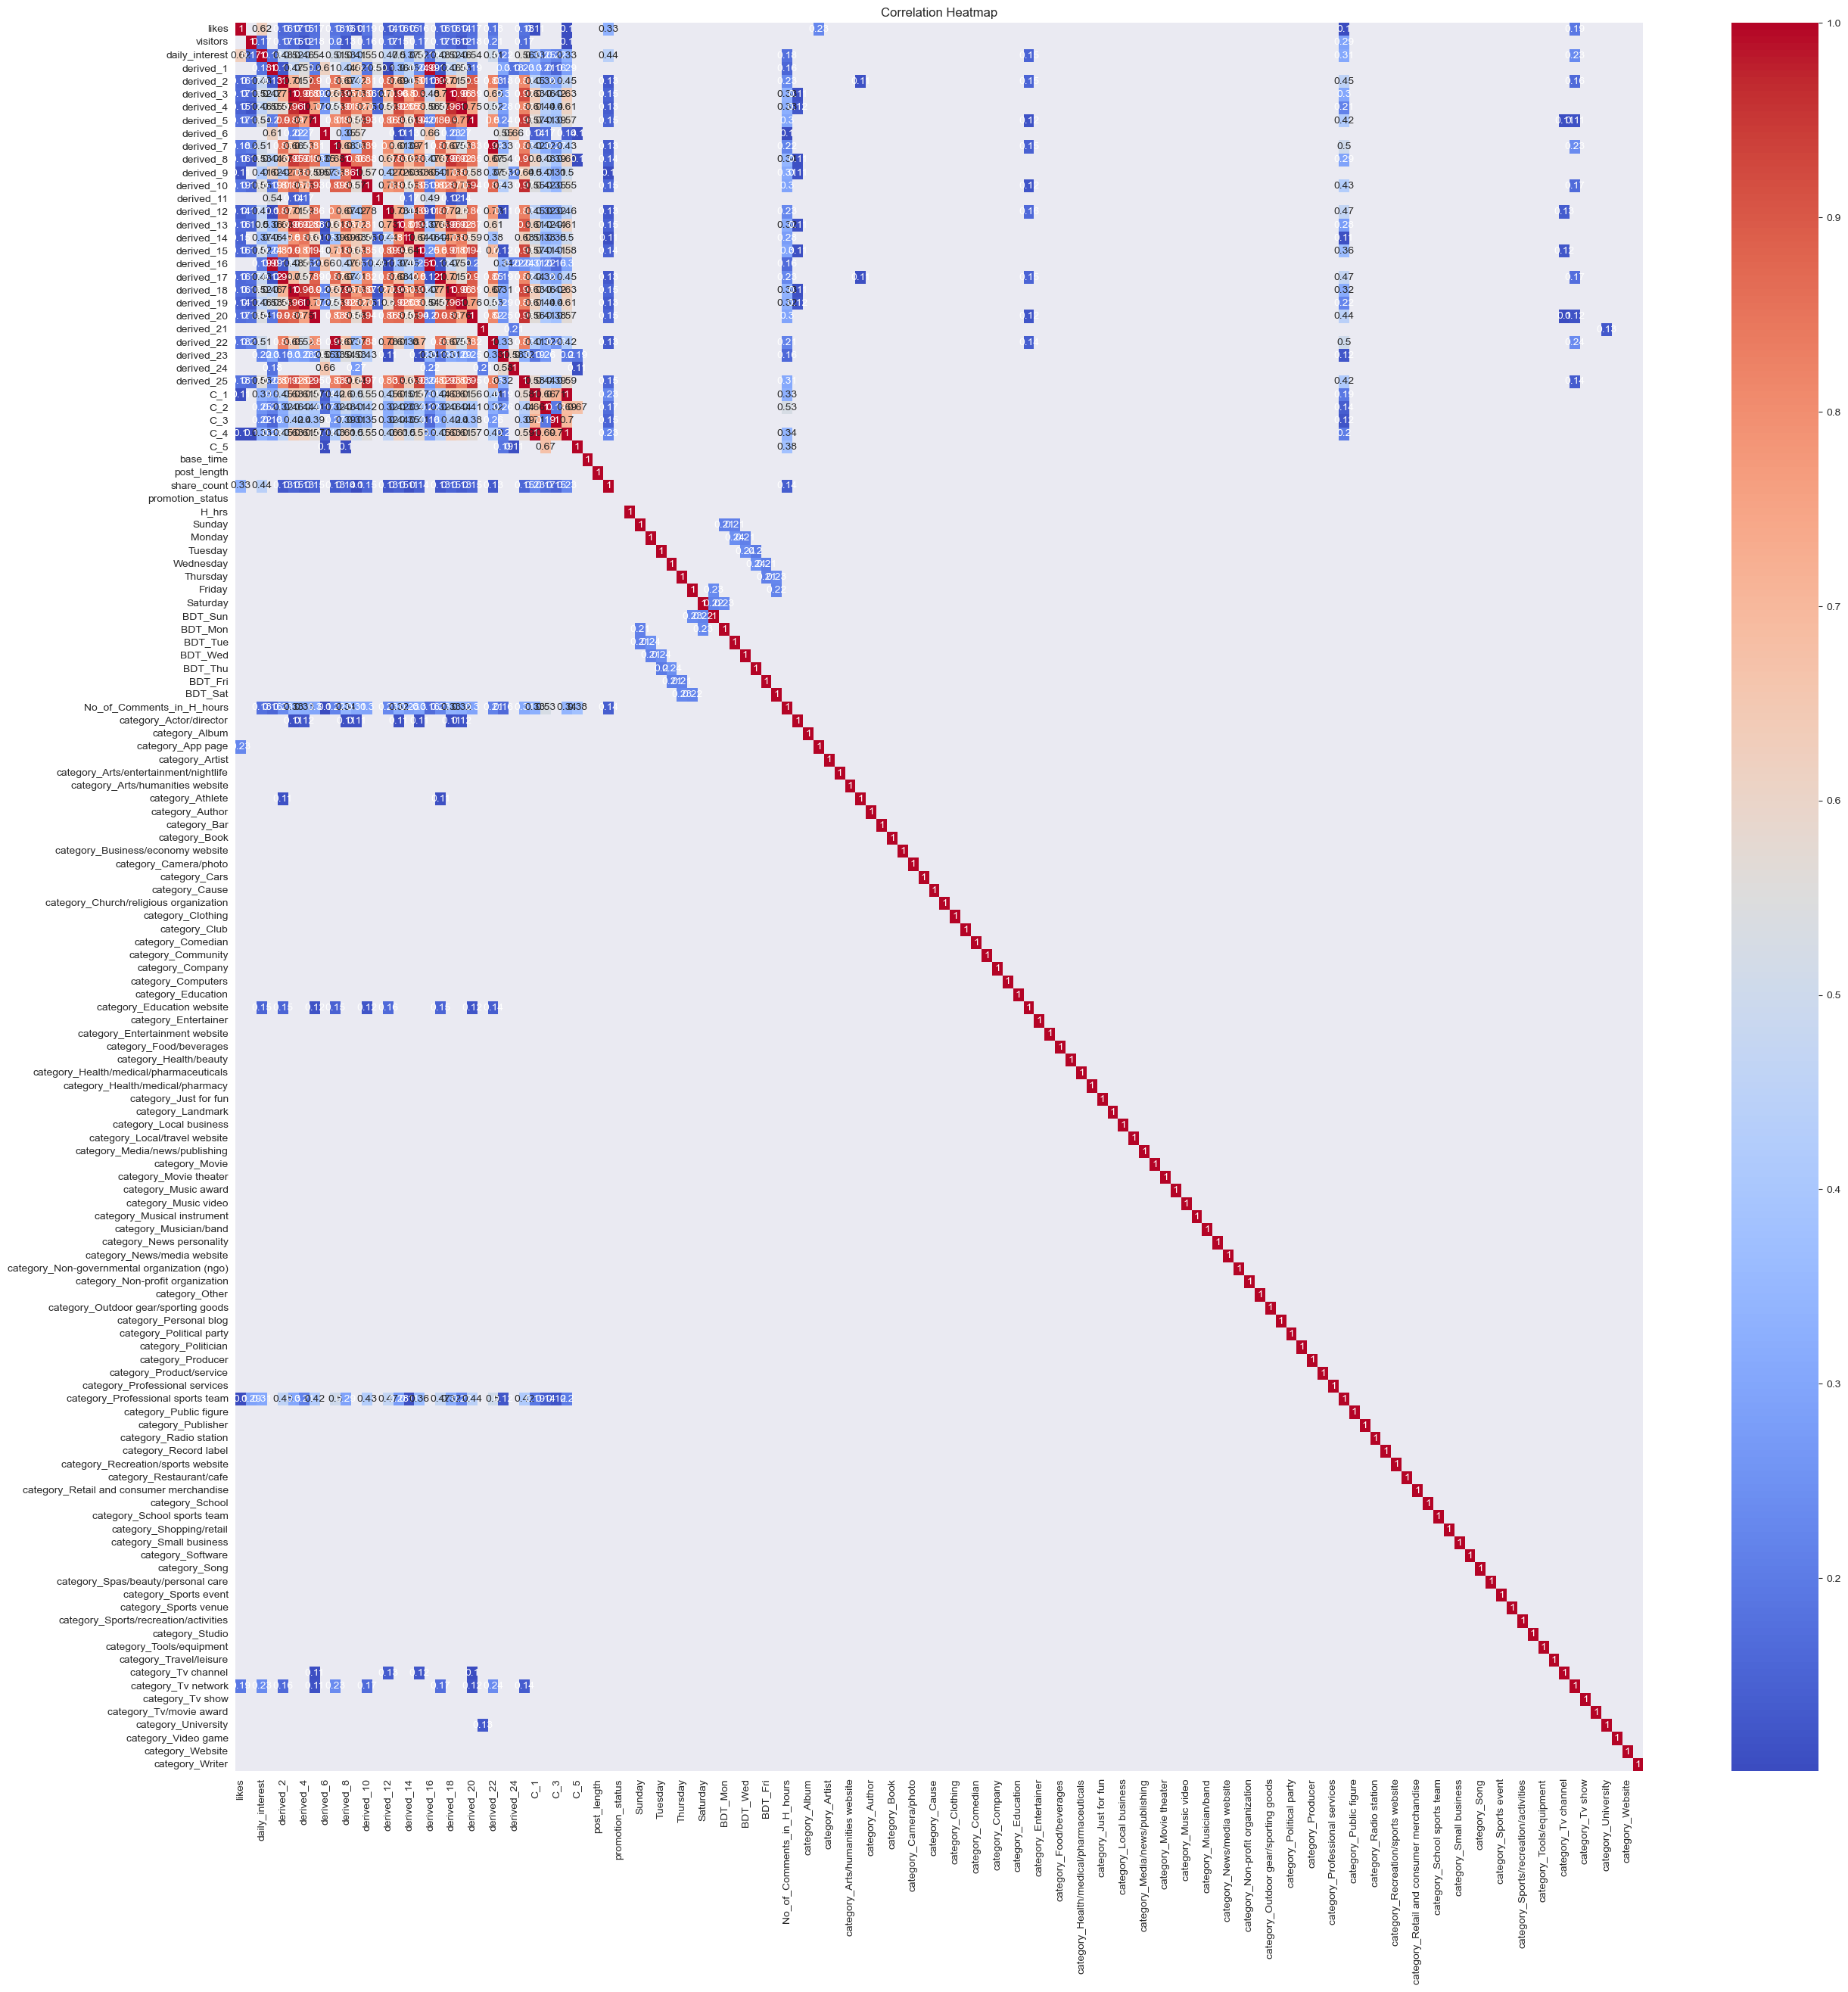

In [69]:
correlation_matrix = encoded_data.corr()
correlation_with_target = correlation_matrix['No_of_Comments_in_H_hours'].sort_values(ascending=False)
filtered_correlation_matrix = correlation_matrix.mask(correlation_matrix < 0.10)
plt.figure(figsize=(30, 30))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")  # Sauvegarde de la figure
plt.show()



## Modeling

In [86]:
data =pd.read_csv("Features_TestSet.csv",names = cols, header = None)
data = data.drop(['promotion_status'], axis=1)
X= data.iloc[:,:52]   #all features] #independent columns
y = data.iloc[:,-1] # pick last column for the target feature

results=[{'model': 'Linear Regression', 'best_params': {}, 'best_score': 878.723979981303, 'test_score': 885.7007446929715}, {'model': 'Ridge Regression', 'best_params': {}, 'best_score': 877.9228700989937, 'test_score': 886.0335012018314}, {'model': 'Random Forest', 'best_params': {}, 'best_score': 476.2067588851948, 'test_score': 439.48283124555695}, {'model': 'SVM Regressor', 'best_params': {}, 'best_score': 1111.8966357463878, 'test_score': 1096.9469769300076}]
# Plotting test MSE for each model
model_names = [result['model'] for result in results]
test_mse = [result['test_score'] for result in results]
fig = px.bar(x=model_names, y=test_mse, labels={'x':'Models', 'y':'Test MSE'}, title='Comparison of Model Performances')
fig.update_xaxes(tickangle=45)

## Feature importance

In [70]:
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
import plotly.express as px
# Initialiser le modèle de régression linéaire
model = LinearRegression()

rfe = RFE(model, n_features_to_select=10)  # Sélectionnez le nombre de caractéristiques souhaité

X = encoded_data.drop('No_of_Comments_in_H_hours', axis=1)
y = encoded_data['No_of_Comments_in_H_hours']

# Appliquer la méthode de sélection de caractéristiques RFE
rfe.fit(X, y)

# Afficher les caractéristiques sélectionnées
selected_features_lr = X.columns[rfe.support_]

# Entraîner le modèle avec les caractéristiques sélectionnées
model.fit(X[selected_features_lr], y)

# Calculer l'importance des caractéristiques par permutation
perm_importance = permutation_importance(model, X[selected_features_lr], y, n_repeats=30)

# Afficher l'importance des caractéristiques
sorted_idx = perm_importance.importances_mean.argsort()
fig = px.bar(x=perm_importance.importances_mean[sorted_idx], y=selected_features_lr[sorted_idx], orientation='h')

fig.update_layout(
xaxis_title="Permutation Importance",
yaxis_title="Features",
title="Permutation Importance"
)

fig.show()

In [16]:
encoded_data = encoded_data.drop(['promotion_status'], axis=1)

In [18]:
X = encoded_data.drop('No_of_Comments_in_H_hours', axis=1)
y = encoded_data['No_of_Comments_in_H_hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In this section, we will try to use several ways to figure out what can be the relevant features in our dataset.

* we use the **Extra Tree Classifier** to determine the top ten features in a dataset

In [21]:
data =pd.read_csv("Features_Variant_1.csv",names = cols, header = None)
data = data.drop(['promotion_status'], axis=1)
X= data.iloc[:,:52]   #all features] #independent columns
y = data.iloc[:,-1] # pick last column for the target feature

from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest(10)

fig = go.Figure(data=[go.Bar(y=top_features.index, x=top_features.values, orientation='h')])

fig.update_layout(title="Top 10 Feature Importances with ExtraTreesClassifier",
xaxis_title="Importance",
yaxis_title="Features")

fig.show()

C:\Users\louis\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



C:\Users\louis\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



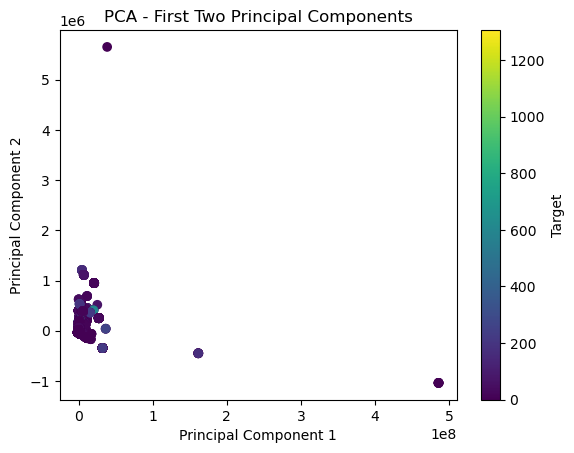

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to your data
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
principal_components = pca.fit_transform(data)

# Create a scatter plot of the first two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Target')
plt.show()

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import chi2

In [24]:
data.shape

(40949, 53)

After, define X & Y

In [25]:
X= data.iloc[:,:52]   #all features
Y= data.iloc[:,-1]   #target output (floods)

Select the top 10 features:

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features to ensure non-negativity
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\louis\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\louis\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [27]:
X_scaled

array([[1.30389152e-03, 0.00000000e+00, 7.60269966e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.30389152e-03, 0.00000000e+00, 7.60269966e-05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.30389152e-03, 0.00000000e+00, 7.60269966e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.47237853e-02, 3.75596931e-04, 8.16099726e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.47237853e-02, 3.75596931e-04, 8.16099726e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.47237853e-02, 3.75596931e-04, 8.16099726e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [28]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_scaled, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns, dfscores], axis=1)
scores.columns = ['specs', 'score']
print(scores.nlargest(10, 'score'))  # Print the 5 best features

         specs        score
9    derived_6  9031.294289
30         C_2  3180.719425
19  derived_16  1926.677764
32         C_4  1912.224111
20  derived_17  1886.687354
5    derived_2  1865.615383
15  derived_12  1862.559623
29         C_1  1815.997476
10   derived_7  1642.613175
4    derived_1  1597.648060


In [31]:
top_features=scores.nlargest(10, 'score')
fig = px.bar(top_features, x='score', y='specs', orientation='h', title="Top 10 Feature Scores")
fig.show()

## Evaluate the Model’s Performance

## Feature Selection and Regression report

In [71]:
# Selection of best features with the 3 modeling (too long with all)
categories = ['C_2', 'C_4', 'C_5', 'post_length', 'share_count', 'base_time', 'C_1','C_3']
target = 'No_of_Comments_in_H_hours'

df_selected = encoded_data[categories + [target]]

In [72]:

X = df_selected[categories]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
random_forest = RandomForestRegressor()
linear_regression = LinearRegression()
svm_regressor = SVR()

In [83]:
random_forest.fit(X_train, y_train)
linear_regression.fit(X_train, y_train)
svm_regressor.fit(X_train, y_train)

SVR()

In [84]:
y_pred_rf = random_forest.predict(X_test)
y_pred_lr = linear_regression.predict(X_test)
y_pred_svm = svm_regressor.predict(X_test)

In [85]:
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
r2_svm = r2_score(y_test, y_pred_svm)

print("Random Forest - RMSE:", rmse_rf)
print("Random Forest - R²:", r2_rf)

print("Linear Regression - RMSE:", rmse_lr)
print("Linear Regression - R²:", r2_lr)

print("Support Vector Machine - RMSE:", rmse_svm)
print("Support Vector Machine - R²:", r2_svm)

Random Forest - RMSE: 0.015299100122301353
Random Forest - R²: 0.6272726239776909
Linear Regression - RMSE: 0.020256758180617073
Linear Regression - R²: 0.3465694946734823
Support Vector Machine - RMSE: 0.06459576432952766
Support Vector Machine - R²: -5.6445810166090595


## Analysis:

#### Random Forest (RF) has the lowest RMSE, indicating better prediction performance compared to the other two models. Additionally, the R² of RF is relatively high, suggesting that the model explains a significant amount of variability in the data.

#### Linear Regression has a slightly higher RMSE than Random Forest, indicating slightly lower prediction performance. Moreover, the R² is lower, suggesting that the model fails to explain as much variability in the data as Random Forest.

#### Support Vector Machine (SVM) has the highest RMSE among the three models, indicating less precise prediction performance. Furthermore, the negative R² suggests that the model fails to explain the variability in the data and may not be suitable for this specific problem.

#### In conclusion, based on the evaluation metrics used, the Random Forest model appears to be the most performant for predicting your target variable. However, it is important to consider other factors such as model complexity, interpretability, and specific requirements of your problem to select the most suitable model.

## Model deployment

API DJANO IS CHOOSED

#### Welcome to our Django website! Our platform offers powerful data visualization and modeling capabilities, along with insightful interpretations.

#### With our site, you can easily explore and analyze datasets. We provide access to both the original dataset and the cleaned dataset, ensuring transparency and allowing you to understand the data preprocessing steps. Our cleaning process ensures that the dataset is free from any unnecessary encodings, giving you a clear view of the underlying information.

#### One of the key features of our website is the ability to create your own models. We offer three different modeling options, each tailored to specific needs. Whether you're interested in regression, classification, or clustering, our platform has you covered. You can choose the model type that best suits your requirements and customize it by selecting the desired number of features.

#### Our goal is to empower you to gain deep insights from your data and make informed decisions. By providing a user-friendly interface and powerful modeling capabilities, we aim to simplify the data analysis process. Whether you are a data scientist, analyst, or business professional, our website offers the tools you need to uncover patterns, make predictions, and derive meaningful interpretations.

#### Join us on our platform and unlock the full potential of your data. Start visualizing and modeling with ease, and let our platform guide you towards data-driven insights that drive success.

# TO LAUNCH THE SITE DJANGO :
# Please run the launchdjangoapi.py in the mysite folder
# Don't forget to : pip install django